In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [2]:
df = pd.read_csv('Exam Anxiety.txt', delimiter='\t')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
Code       103 non-null int64
Revise     103 non-null int64
Exam       103 non-null int64
Anxiety    103 non-null float64
Gender     103 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


In [52]:
df.columns

Index(['Code', 'Revise', 'Exam', 'Anxiety', 'Gender'], dtype='object')

In [53]:
df

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.298,Male
1,2,11,65,88.716,Female
2,3,27,80,70.178,Male
3,4,53,80,61.312,Male
4,5,4,40,89.522,Male
5,6,22,70,60.506,Female
6,7,16,20,81.462,Female
7,8,21,55,75.820,Female
8,9,25,50,69.372,Female
9,10,18,40,82.268,Female


In [54]:
df.head()

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.298,Male
1,2,11,65,88.716,Female
2,3,27,80,70.178,Male
3,4,53,80,61.312,Male
4,5,4,40,89.522,Male


In [55]:
# Sort by "Exam" column
df=df.sort_values(by=['Exam'],ascending=True).reset_index()

In [56]:
df.head()

,index,Code,Revise,Exam,Anxiety,Gender
0,100,101,1,2,82.268,Male
1,38,39,12,5,83.074,Female
2,89,90,3,5,92.746,Male
3,37,38,10,7,81.462,Male
4,80,81,10,10,83.880,Male


In [57]:
#add a column called count. start from index, where index is 0, so add 1
df['count'] = df.index+1

In [58]:
#get number of rows 
n_rows=df.shape[0]
print(n_rows)

103


In [59]:
df['percentile_area'] = (df['count'])/n_rows

In [60]:
from scipy.special import ndtri

In [61]:
#calculate the theorical value (z score based on normal distribution)
df['z_theoretical'] = ndtri(df['percentile_area'])

In [62]:
df['z_actual'] = (df['Exam']-df['Exam'].mean())/df['Exam'].std(ddof=0)

In [63]:
df.head()

,index,Code,Revise,Exam,Anxiety,Gender,count,percentile_area,z_theoretical,z_actual
0,100,101,1,2,82.268,Male,1,0.009709,-2.337418,-2.114050
1,38,39,12,5,83.074,Female,2,0.019417,-2.065931,-1.997835
2,89,90,3,5,92.746,Male,3,0.029126,-1.893793,-1.997835
3,37,38,10,7,81.462,Male,4,0.038835,-1.764369,-1.920359
4,80,81,10,10,83.880,Male,5,0.048544,-1.659141,-1.804144


Text(0.5, 1.0, 'Q-Q plot: Exam and Anxiety')

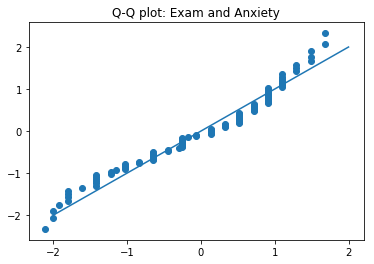

In [64]:
plt.scatter(df.z_actual, df.z_theoretical)
plt.plot([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2])
plt.title("Q-Q plot: Exam and Anxiety")

In [48]:
## Above Plot is not normally distributed, not all plot fall on the Y=X line